In [1]:
import subprocess
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal

from scipy.signal import butter, lfilter
from IPython.display import Audio

In [2]:
def write_result_to_file(path, results):
    with open(path, 'w') as the_file:
        the_file.write("")
    
    keys = list(results[0].keys())
    result_key = ""
    
    for key in keys:
        result_key += key + " "
    
    with open(path, "a") as myfile:
        myfile.write(result_key + "\n")
        
    result_r = ""
    for result in results:
        for key in keys:
            result_r += str(result[key]) + " "
        result_r += "\n"
            
    with open(path, "a") as myfile:
        myfile.write(result_r)

In [3]:
def get_file_name(folder_path):
    with open(folder_path) as file:
        files = file.readlines()
    
    files = [line.rstrip('\n') for line in files]
    return files

In [4]:
def get_result_nicely(results):
    number_of_samples = len(results)
    number_of_success = len([result['status'] for result in results if result['status'] == True])
    print("Number of samples:", number_of_samples)
    print("Success:", number_of_success)
    print("Failure:", number_of_samples - number_of_success)

In [5]:
audio_file_samples = get_file_name('../Testing/sample_names.txt')

In [6]:
audio_file_samples

['090119_FF_75315_KOMP_info_biling_1_6644289560728637345_1_62.wav',
 '090119_MF_KOMP_72358_TBC_1_6644427137121067182_1_62.wav',
 '090119_MM_KOMP_75260_seting_wifi1_1_6644397802494435751_1_62.wav',
 '09_FF_3Jan2019_Telepon_mati_1_6642196769194180990_1_62.wav',
 '09_MM_1Jan19_Internet_Lambat_1_6641254934405777725_1_62.wav',
 '100119_MF_42144_STB_BIND_FCR_YES_1_6644848937269278905_1_62_01.wav',
 '11_MM_42874_43656_13_01_2019_Add_on_HD_1_6646001199685378950_1_62.wav',
 '17_MF_42544_43266_11022019_Info_Billing_1_6656543982892428498_1_62.wav',
 '17_MF__42397_43673_9Jan19_LiveTVtidak_muncul_1_6644410459763056919_1_62.wav',
 '28_MF_18_12_2018_INFO_PRODUK_1_6636308570894834691_1_62.wav',
 '8_FF_04-01-2019_info_produk_1_6642623495669883772_1_62.wav',
 '8_FF_11-02-2019_Cabut_All_1_6656614733888685916_1_62.wav',
 '8_FF_2-Jan-2019_Komp._ggn_inet_tbc_1_6651814107208031660_1_62.wav',
 '8_FF_Telp_Mati_Internet_Tdk_Bisa_Koneksi_USeeTV_Mati_1_6653377024332208084_1_62.wav',
 '8_FM_04-Feb-19_Info_Billing_

### UT-EA-01 Menguji fungsi encoding audio Linear PCM

### UT-EA-01-01 Memastikan fungsi encoding audio dapat mengubah audio codec ke dalam bentuk Linear PCM

## Success

In [7]:
def convert_audio(old_audio, new_audio):
    # -hide_banner, -loglevel panic digunakan untuk menghilangkan keluaran ketika process convert
    # -y digunakan untuk auto replace audio ketika convert dengan nama yang sama
    commands = ['ffmpeg', '-hide_banner', '-loglevel', 'panic', '-y', '-i', old_audio, new_audio]
    try:
        subprocess.check_call(commands)
    except subprocess.CalledProcessError as error:
        print(error)
        return False
    
    return True

In [8]:
old_folder = "../../Resource/sample/"
new_folder = "../Testing/ut_ea_01/"
ut_ea_01 = []

for file_name in audio_file_samples:
    old_file = old_folder + file_name
    new_file = new_folder + file_name
    ut_ea_01.append({
        'in_path': old_folder,
        'out_path': new_folder,
        'filename': file_name,
        'status': convert_audio(old_file, new_file)
    })

text_output = new_folder + "result.txt"
write_result_to_file(text_output, ut_ea_01)
get_result_nicely(ut_ea_01)

Number of samples: 25
Success: 25
Failure: 0


### UT-BF-01-01 Memastikan fungsi bandpass filtering dapat melakukan filtering audio dengan rentang frekuensi 85Hz-255Hz 

## Success

In [9]:
def butter_bandpass_filter(data, fs, lowcut=85, highcut=255, order=1):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    
    b, a = butter(order, [low, high], btype='band')
    y = lfilter(b, a, data)
    
    return y

In [10]:
old_folder = "../../Resource/sample/"
new_folder = "../Testing/ut_bf_01/"

for file_name in audio_file_samples:
    old_file = old_folder + file_name
    new_file = new_folder + file_name
    audio, sr = librosa.load(old_file, sr=None)
    audio = butter_bandpass_filter(audio, sr)
    librosa.output.write_wav(new_file, audio, sr)

Text(0.5, 1.0, 'Linear-frequency power spectrogram')

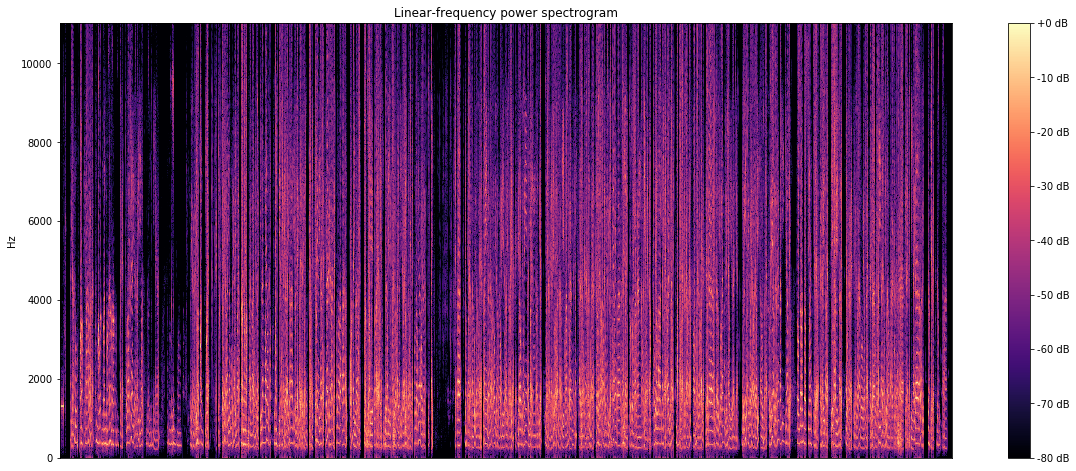

In [11]:
audio, sr = librosa.load(old_file, sr=None)
D = librosa.amplitude_to_db(np.abs(librosa.stft(audio)), ref=np.max)
plt.figure(figsize=(20, 8))
librosa.display.specshow(D, y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')

Text(0.5, 1.0, 'Linear-frequency power spectrogram')

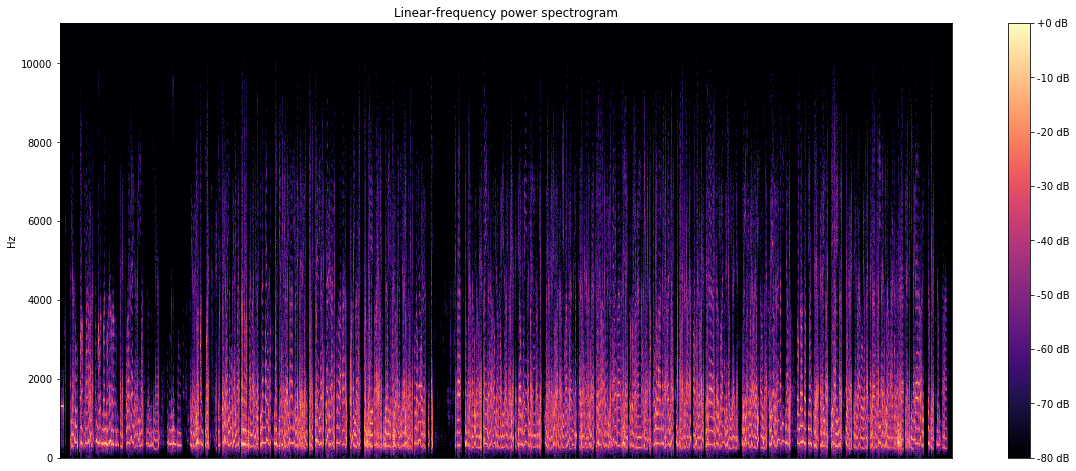

In [12]:
audio, sr = librosa.load(new_file, sr=None)
D = librosa.amplitude_to_db(np.abs(librosa.stft(audio)), ref=np.max)
plt.figure(figsize=(20, 8))
librosa.display.specshow(D, y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')

### UT-NR-01 Menguji fungsi untuk mencari waktu awal noise dan akhir noise

### UT-NR-01-01 Memastikan fungsi dapat mencari waktu awal noise dan akhir noise

## Success

In [13]:
def check_if_sample_below_threshold(sample, high_threshold, low_threshold):
    if sample > 0:
        if sample > low_threshold:
            if sample > high_threshold:
                return False
            else:
                return True
        else:
            return False
    else:
        return True

In [14]:
def find_noise(audio, sr):
    high_threshold = 0.0231781005859375
    low_threshold = 0.00006713867
    noise_start_index = -1
    noise_end_index = -1
    noise_length_threshold = 0.3

    for i, sample in enumerate(audio):
        if check_if_sample_below_threshold(sample, high_threshold, low_threshold):
            if noise_end_index - noise_start_index == sr * noise_length_threshold:
                return noise_start_index, noise_end_index
            if noise_start_index == -1:
                noise_start_index = i
            noise_end_index = i
        else:
            noise_start_index = -1
    return 0, 0

In [15]:
folder = "../Testing/ut_bf_01/"
ut_nr_01 = []

for file_name in audio_file_samples:
    file = folder + file_name
    audio, sr = librosa.load(file, sr=None)
    start_n, end_n = find_noise(audio, sr)
    ut_nr_01.append({
        'in_path': folder,
        'filename': file_name,
        'status': True if 0 <= start_n < end_n else False,
        'start_noise': start_n,
        'end_noise': end_n
    })

text_output = folder + "result.txt"
write_result_to_file(text_output, ut_nr_01)
get_result_nicely(ut_nr_01)

Number of samples: 25
Success: 4
Failure: 21


### UT-NR-02 Menguji fungsi untuk mengambil klip noise dari audio

### UT-NR-02-01 Memastikan fungsi dapat mengambil klip noise dari audio

## Success

In [16]:
def get_noise(audio, start_index, end_index, sr=8000):
    return audio[start_index:end_index]

In [17]:
folder = "../Testing/ut_bf_01/"
out_folder = "../Testing/ut_nr_02/"
ut_nr_02 = []

for result in ut_nr_01:
    if (0 <= result['start_noise'] < result['end_noise']):
        filename = result['filename']
        audio, sr = librosa.load(folder + filename, sr=None)
        clip_noise = get_noise(audio, result['start_noise'], result['end_noise'], sr)
        ut_nr_02.append({
            'in_path': folder,
            'out_path': out_folder,
            'filename': filename,
            'status': True if len(clip_noise > 0) and np.max(clip_noise) > 0 else False,
            'start_noise': result['start_noise'],
            'end_noise': result['end_noise']
        })
        
for result in ut_nr_02:
    if result['status'] == True:
        audio_file = result['in_path'] + result['filename']
        audio, sr = librosa.load(audio_file, sr=None)
        clip_noise = get_noise(audio, result['start_noise'], result['end_noise'], sr)
        librosa.output.write_wav(result['out_path'] + result['filename'], clip_noise, sr)
        
text_output = out_folder + "result.txt"
write_result_to_file(text_output, ut_nr_01)
get_result_nicely(ut_nr_02)

Number of samples: 4
Success: 2
Failure: 2


### UT-NR-04 Menguji fungsi ekstraksi STFT

### UT-NR-04-01 Memastikan fungsi ekstraksi STFT dapat mengekstraksi STFT pada klip noise yang telah diambil berupa matriks STFT noise

## Success

In [18]:
def _stft(y, n_fft, hop_length, win_length):
    return librosa.stft(y=y, n_fft=n_fft, hop_length=hop_length, win_length=win_length)

def _amp_to_db(x):
    return librosa.core.amplitude_to_db(x, ref=1.0, amin=1e-20, top_db=80.0)

In [19]:
ut_nr_04_01 = []

for result in ut_nr_02:
    if result['status'] == True:
        audio_file = result['in_path'] + result['filename']
        audio, sr = librosa.load(audio_file, sr=None)
        clip_noise = audio[result['start_noise']:result['end_noise']]
        
        # STFT pada noise
        noise_stft = _stft(clip_noise, n_fft=4096, hop_length=512, win_length=2048)
        # convert ke dB
        noise_stft_db = _amp_to_db(np.abs(noise_stft))
        
        ut_nr_04_01.append({
            'in_path': result['in_path'],
            'filename': result['filename'],
            "noise_stft": noise_stft,
            "noise_stft_db": noise_stft_db
        })

In [20]:
ut_nr_04_01

[{'in_path': '../Testing/ut_bf_01/',
  'filename': '17_MF_42544_43266_11022019_Info_Billing_1_6656543982892428498_1_62.wav',
  'noise_stft': array([[ 1.09421350e-01+0.0000000e+00j,  5.46188504e-02+0.0000000e+00j,
          -2.30734950e-05+0.0000000e+00j, -1.99656119e-03+0.0000000e+00j,
          -2.78736688e-02+0.0000000e+00j],
         [-1.09507866e-01+1.8973538e-18j, -3.85374315e-02-3.8734581e-02j,
          -3.25978872e-05+9.5433163e-05j,  3.65564454e-04-2.1165726e-03j,
           2.38822121e-02-1.4490651e-02j],
         [ 1.09724395e-01+2.9544509e-17j, -3.08523304e-04+5.4789215e-02j,
           1.57039962e-04-1.2693094e-04j,  1.99400005e-03+9.2974491e-04j,
          -1.30363945e-02+2.4926102e-02j],
         ...,
         [-6.71301910e-04-2.8243467e-17j, -2.02024399e-04+2.8267773e-04j,
          -1.17142517e-05+1.8338035e-04j,  9.55055511e-05-9.5772688e-05j,
          -3.33741220e-04-5.3594913e-04j],
         [ 7.88697624e-04+5.5809307e-17j,  4.52652952e-04-2.1819405e-04j,
         

### UT-NR-04-02 Memastikan fungsi ekstraksi STFT dapat mengekstraksi STFT pada klip audio yang telah diambil berupa matriks STFT audio

## Success

In [21]:
ut_nr_04_02 = []

for result in ut_nr_02:
    if result['status'] == True:
        audio_file = result['in_path'] + result['filename']
        audio, sr = librosa.load(audio_file, sr=None)
        
        # STFT pada noise
        audio_stft = _stft(audio, n_fft=4096, hop_length=512, win_length=2048)
        # convert ke dB
        audio_stft_db = _amp_to_db(np.abs(audio_stft))
        
        ut_nr_04_02.append({
            'in_path': result['in_path'],
            'filename': result['filename'],
            "audio_stft": audio_stft,
            "audio_stft_db": audio_stft_db
        })

In [22]:
ut_nr_04_02

[{'in_path': '../Testing/ut_bf_01/',
  'filename': '17_MF_42544_43266_11022019_Info_Billing_1_6656543982892428498_1_62.wav',
  'audio_stft': array([[ 3.12911929e-04+0.0000000e+00j,  1.08188806e-05+0.0000000e+00j,
          -3.11065174e-04+0.0000000e+00j, ...,
           1.99622926e-04+0.0000000e+00j, -5.78445476e-03+0.0000000e+00j,
          -4.76512797e-02+0.0000000e+00j],
         [-9.46099317e-05-7.0906822e-17j, -1.51570974e-04-4.7615238e-05j,
           2.59567430e-04-2.2279378e-04j, ...,
          -2.19527778e-04+2.2169252e-04j,  3.99739161e-04-7.0611197e-03j,
           4.49640080e-02-1.9778201e-02j],
         [-1.03161074e-04-7.9255179e-17j,  3.14105506e-04+5.7993639e-06j,
          -2.60784233e-04+3.5827380e-04j, ...,
           2.80068693e-04-2.2159351e-04j,  8.76941252e-03+3.7386636e-03j,
          -3.65440995e-02+3.8123731e-02j],
         ...,
         [ 7.18659605e-04-1.7889336e-17j, -1.69964231e-04-3.5898559e-04j,
           1.10897490e-04+1.8677393e-04j, ...,
           4

### UT-NR-03 Menguji fungsi perhitungan statistik pada noise

### Memastikan fungsi perhitungan statistik pada noise dapat menghitung mean dan standard deviation STFT noise dari matriks STFT noise

## Success

In [23]:
ut_nr_03 = []
n_std_thresh = 1.5

for result in ut_nr_04_01:
    noise_stft_db = result['noise_stft_db']
    # Menghitung statistik pada noise
    mean_freq_noise = np.mean(noise_stft_db, axis=1)
    std_freq_noise = np.std(noise_stft_db, axis=1)
    noise_thresh = mean_freq_noise + std_freq_noise * n_std_thresh
    ut_nr_03.append({
        'in_path': result['in_path'],
        'filename': result['filename'],
        'mean_freq_noise': mean_freq_noise,
        'std_freq_noise': std_freq_noise,
        'noise_thresh': noise_thresh
    })

In [24]:
ut_nr_03

[{'in_path': '../Testing/ut_bf_01/',
  'filename': '17_MF_42544_43266_11022019_Info_Billing_1_6656543982892428498_1_62.wav',
  'mean_freq_noise': array([-38.83638 , -38.70362 , -38.641636, ..., -64.2634  , -63.923412,
         -63.800835], dtype=float32),
  'std_freq_noise': array([17.457802  , 17.352821  , 17.330605  , ...,  0.46848568,
          0.9975202 ,  1.2194023 ], dtype=float32),
  'noise_thresh': array([-12.649677, -12.674389, -12.645729, ..., -63.56067 , -62.42713 ,
         -61.971733], dtype=float32)},
 {'in_path': '../Testing/ut_bf_01/',
  'filename': '9_MM_08_01_2019_useetv_eror_panduan_1_6644111207916711359_1_62.wav',
  'mean_freq_noise': array([-43.28062 , -43.343147, -43.428963, ..., -63.62876 , -63.62876 ,
         -63.552044], dtype=float32),
  'std_freq_noise': array([1.3878260e+01, 1.3890368e+01, 1.3885529e+01, ..., 3.8146973e-06,
         3.8146973e-06, 1.5342101e-01], dtype=float32),
  'noise_thresh': array([-22.46323 , -22.507595, -22.60067 , ..., -63.628754, -

### UT-NR-05 Menguji fungsi masking audio

### Memastikan fungsi masking audio dapat melakukan masking pada matriks STFT audio

## Success

In [25]:
def _db_to_amp(x,):
    return librosa.core.db_to_amplitude(x,ref=1.0)

In [26]:
n_grad_freq=2
n_grad_time=4
prop_decrease=1.0

folder_name_1 = ut_nr_04_02[0]['in_path']
filename_1 = ut_nr_04_02[0]['filename']
sig_stft = ut_nr_04_02[0]['audio_stft']
sig_stft_db = ut_nr_04_02[0]['audio_stft_db']

folder_name_2 = ut_nr_03[0]['in_path']
filename_2 = ut_nr_03[0]['filename']
mean_freq_noise = ut_nr_03[0]['mean_freq_noise']
noise_thresh = ut_nr_03[0]['noise_thresh']

# Menghitung nilai masing pada desibel
mask_gain_dB = np.min(_amp_to_db(np.abs(sig_stft)))

# Membuat filter smoothing untuk masking pada waktu dan frekuensi
smoothing_filter = np.outer(np.concatenate([np.linspace(0, 1, n_grad_freq+1, endpoint=False),
                                            np.linspace(1, 0, n_grad_freq+2)])[1:-1],
                            np.concatenate([np.linspace(0, 1, n_grad_time+1, endpoint=False),
                                            np.linspace(1, 0, n_grad_time+2)])[1:-1])
smoothing_filter = smoothing_filter/np.sum(smoothing_filter)

# Menghitung threshold pada setiap frekuensi/time bin
db_thresh = np.repeat(np.reshape(noise_thresh, [1, len(mean_freq_noise)]), np.shape(sig_stft_db)[1], axis=0).T

# Mask apabila sinyal diatas nilai threshold
sig_mask = sig_stft_db < db_thresh

# Convolce mask dengan smoothing filter
sig_mask = scipy.signal.fftconvolve(sig_mask, smoothing_filter,  mode='same')
sig_mask = sig_mask * prop_decrease

# Mask sinyal audio
sig_stft_db_masked = sig_stft_db *(1-sig_mask) + np.ones(np.shape(mask_gain_dB))*mask_gain_dB*sig_mask # mask real
sig_imag_masked = np.imag(sig_stft)*(1-sig_mask)
sig_stft_amp = ((_db_to_amp(sig_stft_db_masked)*np.sign(sig_stft))+(1j * sig_imag_masked))

In [27]:
print(folder_name_1, folder_name_2)
print(filename_1, filename_2)
print(sig_stft_amp)

../Testing/ut_bf_01/ ../Testing/ut_bf_01/
17_MF_42544_43266_11022019_Info_Billing_1_6656543982892428498_1_62.wav 17_MF_42544_43266_11022019_Info_Billing_1_6656543982892428498_1_62.wav
[[ 0.00753767+0.00000000e+00j  0.00753767+0.00000000e+00j
  -0.00753767+0.00000000e+00j ...  0.00753767+0.00000000e+00j
  -0.00753767+0.00000000e+00j -0.02278976+0.00000000e+00j]
 [-0.00753767-3.30898503e-17j -0.00753767-1.54484995e-05j
   0.00753767-4.85195344e-05j ... -0.00753767+4.82797044e-05j
   0.00753767-2.29094104e-03j  0.01807677-9.22982730e-03j]
 [-0.00753767-3.17020715e-17j  0.00753767+1.39184733e-06j
  -0.00753767+4.29928559e-05j ...  0.00753767-2.65912211e-05j
   0.00797474+8.97279270e-04j -0.0164221 +1.52494922e-02j]
 ...
 [ 0.00753767-1.78893358e-17j -0.00753767-3.58985591e-04j
   0.00753767+1.86773934e-04j ...  0.00753767-4.93684202e-05j
  -0.00753767+1.86380552e-04j  0.00753767+7.14278838e-04j]
 [-0.00753767+1.51788304e-18j -0.00753767+2.38137305e-04j
  -0.00753767-1.01577083e-04j ... -0.

### UT-NR-06 Menguji fungsi recover audio

### Memastikan fungsi recover audio dapat mengubah matriks STFT audio yang telah dilakukan masking ke dalam bentuk time series

In [28]:
def _istft(y, hop_length, win_length):
    return librosa.istft(y, hop_length, win_length)

In [29]:
out_folder = "../Testing/ut_nr_06/"
filename = ut_nr_03[0]['filename']

hop_length=512
win_length=2048
n_fft=4096

# Mengembalikan sinyal audio kedalam bentuk time series
recovered_signal = _istft(sig_stft_amp, hop_length, win_length)
recovered_spec = _amp_to_db(np.abs(_stft(recovered_signal, n_fft, hop_length, win_length)))

librosa.output.write_wav(out_folder + filename, recovered_signal, sr)

In [30]:
Audio(recovered_signal, rate=sr)